# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

I think that each digit should have approximately 1/9th of the entire distribution. There is no reason for one number or another to be more prevalent (that I can think of).



## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

location = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(location + "sp500.csv")
# the unit of observation is a specific stock (for example, Apple or Tesla), which has a unique stock ticker name. That ticker name is a natural index.
df_sp500.set_index("Name")

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


The unit of observation is a specific stock (for example, Apple or Tesla), which has a unique stock ticker name. That ticker name is a natural index.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

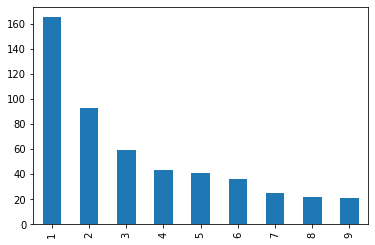

In [ ]:
import pandas as pd

location = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(location + "sp500.csv")
df_sp500.set_index("Name")

df_sp500["volume_strings"] = df_sp500.volume.astype(pd.StringDtype())
pd.value_counts(df_sp500.volume_strings.str[0]).plot(kind='bar')

<table>
  <tr>
    <th> First Digit</th>
    <th> Frequency </th>
  </tr>
  <tr>
    <td> 1</td>
    <td> 165 </td>
  </tr>
<tr>
    <td> 2</td>
    <td> 93 </td>
  </tr>
  <tr>
    <td> 3</td>
    <td> 59 </td>
  </tr>
  <tr>
    <td> 4</td>
    <td> 43 </td>
  </tr>
  <tr>
    <td> 5</td>
    <td> 41 </td>
  </tr><tr>
    <td> 6</td>
    <td> 36 </td>
  </tr>
  <tr>
    <td> 7</td>
    <td> 25 </td>
  </tr>
  <tr>
    <td> 8</td>
    <td> 22 </td>
  </tr>
  <tr>
    <td> 9</td>
    <td> 21 </td>
  </tr>
</table>

This is radically different than how I predicted. As the digits get higher, they get less common as starts to stock trade frequencies.
    

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

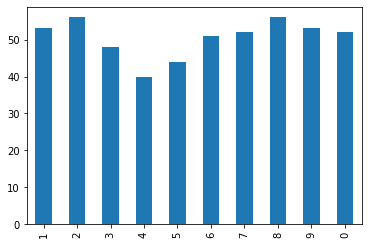

In [ ]:
import pandas as pd

location = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(location + "sp500.csv")
df_sp500.set_index("Name")

df_sp500["volume_strings"] = df_sp500.volume.astype(pd.StringDtype())
pd.value_counts(df_sp500.volume_strings.str[-1]).loc[["1","2","3","4","5","6","7","8","9", "0"]].plot(kind='bar')

<table>
  <tr>
    <th> Final Digit</th>
    <th> Frequency </th>
  </tr>
  <tr>
    <td> 1</td>
    <td> 53 </td>
  </tr>
<tr>
    <td> 2</td>
    <td> 56 </td>
  </tr>
  <tr>
    <td> 3</td>
    <td> 48 </td>
  </tr>
  <tr>
    <td> 4</td>
    <td> 40 </td>
  </tr>
  <tr>
    <td> 5</td>
    <td> 44 </td>
  </tr><tr>
    <td> 6</td>
    <td> 51 </td>
  </tr>
  <tr>
    <td> 7</td>
    <td> 52 </td>
  </tr>
  <tr>
    <td> 8</td>
    <td> 56 </td>
  </tr>
  <tr>
    <td> 9</td>
    <td> 53 </td>
  </tr>
  <tr>
    <td> 0</td>
    <td> 52 </td>
  </tr>
</table>

This is also odd! The final digits seem to be evenly distributed, like how I predicted leading digits would behave.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

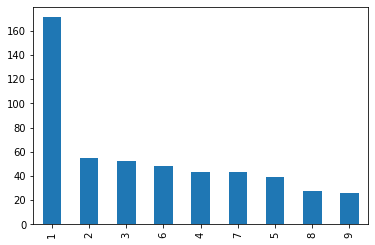

In [ ]:
import pandas as pd

location = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(location + "sp500.csv")
df_sp500.set_index("Name")

df_sp500["close_strings"] = df_sp500.close.astype(pd.StringDtype()).str[1:]
pd.value_counts(df_sp500.close_strings.str[0]).plot(kind='bar')

<table>
  <tr>
    <th> Final Digit</th>
    <th> Frequency </th>
  </tr>
  <tr>
    <td> 1</td>
    <td> 171 </td>
  </tr>
<tr>
    <td> 2</td>
    <td> 55 </td>
  </tr>
  <tr>
    <td> 3</td>
    <td> 52 </td>
  </tr>
  <tr>
    <td> 4</td>
    <td> 48 </td>
  </tr>
  <tr>
    <td> 5</td>
    <td> 43 </td>
  </tr><tr>
    <td> 6</td>
    <td> 43 </td>
  </tr>
  <tr>
    <td> 7</td>
    <td> 38 </td>
  </tr>
  <tr>
    <td> 8</td>
    <td> 29 </td>
  </tr>
  <tr>
    <td> 9</td>
    <td> 26 </td>
  </tr>
</table>

It appears that volume was not a fluke (at least within the context of the stock market). Leading digits tend to be smaller.